In [1]:
import pandas as pd
import random
import numpy
from IPython.display import HTML
from matplotlib import pylab
from matplotlib import pyplot as plt
from IPython.display import Image



In [2]:
HTML('<h2> Understanding Experimental Data')

In [33]:
display(HTML('''<img src="dist1.png" style = "width:600px;height:300px;">'''))

HTML('''

<p>In case of predictive modeling when we are trying to relate independant values along X axis to dependant values along Y axis. </p>

<p> Distance between point and line can be </p>

<li> along x axis: doesn't make sense because values along x axis are independant variables</li>
<li> perpendicular: Makes sense in the case of classifiers/separators.</li>

<li> along y axis: since wer tryng to predict dependant value: 
                    so displacement/uncertainty is along Y.</li>

<p>LSE= sum(observed - predicted)^2 
<br>
equivalent to variance x no. of observations</p> 


<p>minimizing MSE equivalent to minimizing variance between predicted and measured</p>

<p>Linear regression:</p>
sum squared makes sure surface only has 1 minimum
<br>
start at a point, walk downhill: linearly regress until you get to the lowest point.



''')

In [40]:
HTML(''' <p>Pylab funtions to find polynomial fits:</p>

<br>
<p><b><center>pylab.polyfit(observedX, observedY, n)</center></b></p>
<br>
Finds co-efficient of a polynomial of degree n that provides a best least squares fit for the observed data
''')



a =  0.046432033192052496 b = 0.06562859649122817


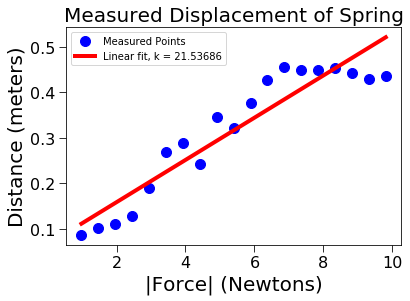

In [5]:
def fitData(fileName):
    xVals, yVals = getData(fileName)
    # convert to array
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    #get force
    xVals = xVals*9.81 

    pylab.plot(xVals, yVals, 'bo', label = 'Measured Points')
    labelPlot()
    
    # degree 1
    # gives tuple a, b for best fit line
    a,b = pylab.polyfit(xVals, yVals, 1)
    
    # calculate predicted values
    estYVals = a * pylab.array(xVals) + b
    
    # plot predicted values
    print('a = ', a,'b =', b)
    pylab.plot(xVals, estYVals, 'r',label = 'Linear fit, k = '+str(round(1/a,5)))
    pylab.legend(loc='best')
    
fitData('springData.txt')


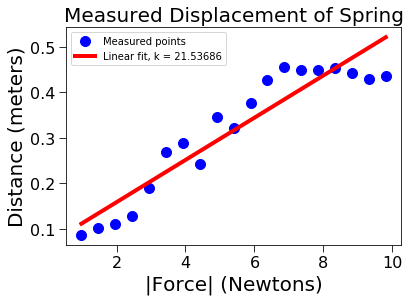

In [6]:
# Variation of fitData: Using pylab.polyval() to get predicted values
# With this, it is easier to adjust order of polyomial.
def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    model = pylab.polyfit(xVals, yVals, 1)
    estYVals = pylab.polyval(model, xVals)
    
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/model[0], 5)))
    pylab.legend(loc = 'best')

fitData1('springData.txt')


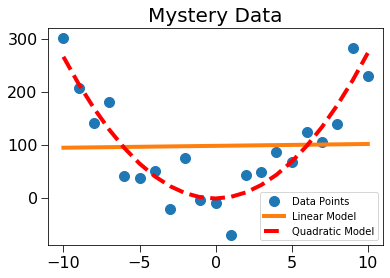

In [7]:
#Demonstration using mystery data

xVals, yVals = getData('mysteryData.txt')
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')

#Try linear model
model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, pylab.polyval(model1, xVals),
          label = 'Linear Model')

#Try a quadratic model
model2 = pylab.polyfit(xVals, yVals, 2)
pylab.plot(xVals, pylab.polyval(model2, xVals),
          'r--', label = 'Quadratic Model')
pylab.legend()

In [8]:
display(HTML('''<h3>Quadratic appears to be a better fit. Could higher order polynomials be a better fit? 
                   What is the best way to do the fit?</h3>'''))

display(HTML('''<p><b>Compare Different fits:</b></p>
<li>Relative to each other how to measure which one is better?</li>
<li>Would a higher order be better? </li>'''))


In [9]:

##Compare models
def aveMeanSquareError(data, predicted):
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

# Avg MSE for linear model:
estYVals = pylab.polyval(model1, xVals)
print('Ave. mean squared error for linear model =',
     aveMeanSquareError(yVals, estYVals))


# Avg MSE for quadratic model:
estYVals = pylab.polyval(model2, xVals)
print('Ave. mean square error for quadratic model =',
     aveMeanSquareError(yVals, estYVals))
    



Ave. mean squared error for linear model = 9372.730789652878
Ave. mean square error for quadratic model = 1524.0204471835434


In [1]:
display(HTML('''<li>Quadratic is better of the 2 models, how to find if there could be another better model out there? </li>
<p>Co-efficient of determination:</p>'''))

HTML('''<img src="cod1.png" style = "width:600px;height:150px;">''')

NameError: name 'HTML' is not defined

In [11]:
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))

# Mean Error/Variance is same as error in estimates/variability




In [ ]:
# Generate fits of different degrees
def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

# test Fits
def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

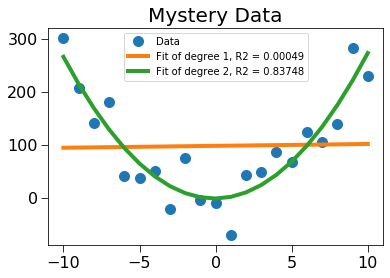

In [16]:
#code for testing goodness of fit to parabolic data

xVals, yVals = getData('mysteryData.txt')
degrees = (1, 2)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

In [21]:
HTML('''
<li>Linear fit is accounting for < 1% of the variability in the data.</li>
<li>Quadratic fit is accounting for 83% of the variability in the data.</li>
<li> Compare higher order fits. </li>
''')


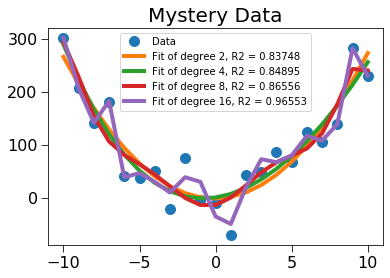

In [17]:
#Compare higher-order fits
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

In [22]:
HTML(''' <li> Just because Polynomial of degree 16 fits the data best, does not mean we should use it. Continued in next lecture</li>''')